# Task 1: Data Exploration and Processing

## Part 1: Explore your specific dataset
by calculating basic statistics number of samples and number of samples per class: is your dataset balanced? min / avg / max length of text reading through 100+ samples: noteworthy style, vocabulary, idioms.

### Imports

In [1]:
from datasets import load_dataset
import pandas as pd
import numpy as np

from utils import plot_class_distribution



### Load Data

In [2]:
def load_medical_dataset(dataset_name="argilla/medical-domain", split=None):
    """
    Loads the dataset

    Parameters:
        dataset_name (string): Defaults to medical-domain dataset from Hugging Face*

    Returns:
        Dataset (if split is not None) or DatasetDict (split is None)
    """
    try:
        # Load the dataset
        dataset = load_dataset(dataset_name, split=split)
        print("Dataset loaded successfully!")
        print(f"Available splits: {list(dataset.keys())}")
        
        return dataset
    
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None
    

In [3]:
dataset = load_medical_dataset()


Dataset loaded successfully!
Available splits: ['train']


### Data Visualization/Analysis

In [4]:
def analyze_dataset_statistics(dataset):
    """
    Analyze the length of text and distribution of samples across different classes in the dataset
    """
    for split_name, split_data in dataset.items():
        
        # Display number of samples
        print(f"\nNumber of samples: {len(split_data)}")
        print(f"\tFeatures: {list(split_data.features.keys())}")
        #print(f"  First sample: {split_data[1]}")
        if len(split_data) > 0:
            # Calculate Min, Avg, Max length of text
            text_lengths = [len(sample['text']) for sample in split_data if 'text' in sample]
            if text_lengths:
                min_length = min(text_lengths)
                avg_length = sum(text_lengths) / len(text_lengths)
                max_length = max(text_lengths)
                print(f"\tText length:\n\t\tMin: {min_length}\n\t\tAvg: {avg_length:.2f}\n\t\tMax: {max_length}")
        
        print("\nAnalyzing class distribution:")
        # Count samples per class
        class_counts = {}
        total_samples = len(split_data)
        
        for sample in split_data:
            if 'prediction' in sample and isinstance(sample['prediction'], list):
                for label in sample['prediction']:
                    if 'label' in label:
                        prediction = label['label']
                        class_counts[prediction] = class_counts.get(prediction, 0) + 1
        
        # Display results
        if class_counts:
            print("\nClass distribution:")
            for class_name, count in class_counts.items():
                percentage = (count / total_samples) * 100
                print(f"\t{class_name}: {count} samples ({percentage:.2f}%)")
        else:
            print("No prediction labels found in this split")

if dataset:
    analyze_dataset_statistics(dataset)


Number of samples: 4966
	Features: ['text', 'inputs', 'prediction', 'prediction_agent', 'annotation', 'annotation_agent', 'multi_label', 'explanation', 'id', 'metadata', 'status', 'event_timestamp', 'metrics']
	Text length:
		Min: 11
		Avg: 3052.31
		Max: 18425

Analyzing class distribution:

Class distribution:
	 Gastroenterology: 224 samples (4.51%)
	 Surgery: 1088 samples (21.91%)
	 Radiology: 273 samples (5.50%)
	 SOAP / Chart / Progress Notes: 166 samples (3.34%)
	 Letters: 23 samples (0.46%)
	 Lab Medicine - Pathology: 8 samples (0.16%)
	 Consult - History and Phy.: 516 samples (10.39%)
	 Podiatry: 47 samples (0.95%)
	 General Medicine: 259 samples (5.22%)
	 Psychiatry / Psychology: 53 samples (1.07%)
	 Cardiovascular / Pulmonary: 371 samples (7.47%)
	 Urology: 156 samples (3.14%)
	 Ophthalmology: 83 samples (1.67%)
	 Physical Medicine - Rehab: 21 samples (0.42%)
	 Neurology: 223 samples (4.49%)
	 Autopsy: 8 samples (0.16%)
	 Orthopedic: 355 samples (7.15%)
	 Hematology - Oncolo

In [5]:
texts = dataset['train']['text']
labels = dataset['train']['prediction']
# Load into a DataFrame for easier handling
df = pd.DataFrame({
    "text": texts,
    "label": labels
})

df['label'].head(10).tolist()

[[{'label': ' Gastroenterology', 'score': 1.0}],
 [{'label': ' Surgery', 'score': 1.0}],
 [{'label': ' Radiology', 'score': 1.0}],
 [{'label': ' Surgery', 'score': 1.0}],
 [{'label': ' SOAP / Chart / Progress Notes', 'score': 1.0}],
 [{'label': ' Letters', 'score': 1.0}],
 [{'label': ' Surgery', 'score': 1.0}],
 [{'label': ' Radiology', 'score': 1.0}],
 [{'label': ' Lab Medicine - Pathology', 'score': 1.0}],
 [{'label': ' Surgery', 'score': 1.0}]]

In [6]:
def extract_label(prediction_list):
    """
    """
    if isinstance(prediction_list, list) and len(prediction_list) > 0:
        item = prediction_list[0]
        if isinstance(item, dict) and 'label' in item:
            return item['label'].strip()  # remove space
    return None

df = pd.DataFrame({
    "text": texts,
    "label": [extract_label(p) for p in labels]
})
df['label'].head(10).tolist()

['Gastroenterology',
 'Surgery',
 'Radiology',
 'Surgery',
 'SOAP / Chart / Progress Notes',
 'Letters',
 'Surgery',
 'Radiology',
 'Lab Medicine - Pathology',
 'Surgery']

Total samples: 4966
Unique labels: 40

Samples per class:
label
Surgery                          1088
Consult - History and Phy.        516
Cardiovascular / Pulmonary        371
Orthopedic                        355
Radiology                         273
General Medicine                  259
Gastroenterology                  224
Neurology                         223
SOAP / Chart / Progress Notes     166
Urology                           156
Obstetrics / Gynecology           155
Discharge Summary                 108
ENT - Otolaryngology               96
Neurosurgery                       94
Hematology - Oncology              90
Ophthalmology                      83
Nephrology                         81
Emergency Room Reports             75
Pediatrics - Neonatal              70
Pain Management                    61
Psychiatry / Psychology            53
Office Notes                       50
Podiatry                           47
Dermatology                        29
Cosmetic / Plastic Surge

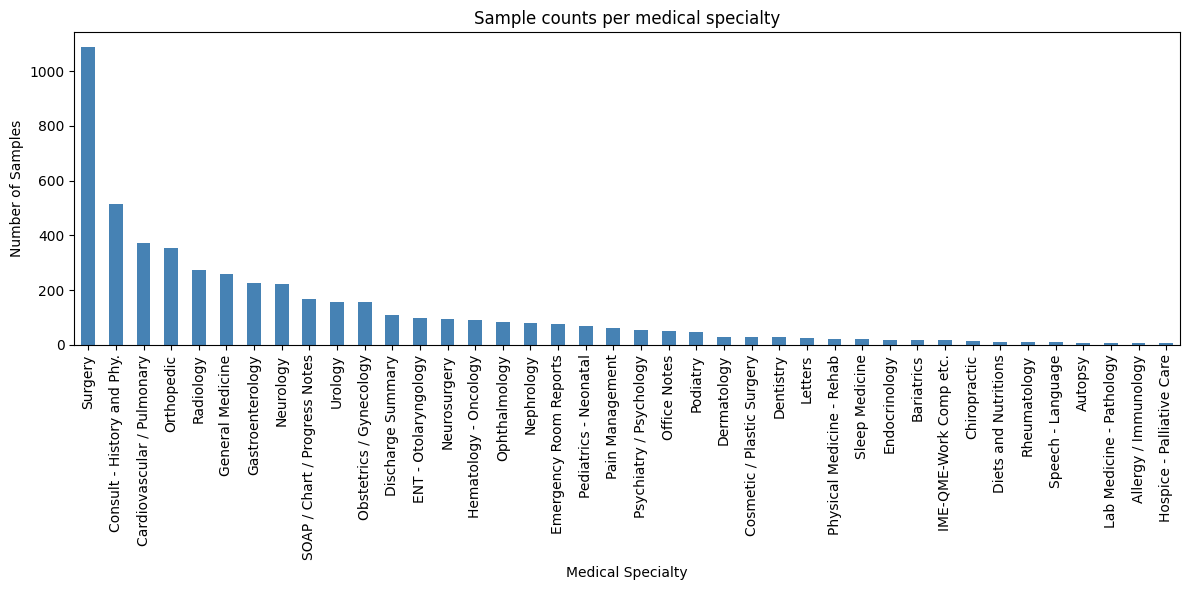

In [7]:

# --- 1. Basic info ---
print(f"Total samples: {len(df)}")
print(f"Unique labels: {df['label'].nunique()}")

# Count per class
label_counts = df['label'].value_counts()
print("\nSamples per class:")
print(label_counts)

# Check balance
print("\nDataset balance:")
print((label_counts / len(df) * 100).round(2))


plot_class_distribution(label_counts)


In [8]:
# --- 2. Text length statistics ---
df['length'] = df['text'].apply(lambda x: len(str(x).split()))

print("\nText length statistics:")
print(f"Min: {df['length'].min()}")
print(f"Avg: {df['length'].mean():.2f}")
print(f"Max: {df['length'].max()}")



Text length statistics:
Min: 1
Avg: 465.45
Max: 3029


In [9]:

# --- 3. Example inspection ---

# number of examples per class (adjust if needed)
examples_per_class = 3

# loop over each unique label
for label_name in sorted(df['label'].dropna().unique()):
    print(f"\n{'='*20} {label_name} {'='*20}")
    subset = df[df['label'] == label_name]
    
    # sample up to 'examples_per_class' texts from this class
    sample_texts = subset['text'].sample(min(len(subset), examples_per_class), random_state=42)
    
    for i, text in enumerate(sample_texts, start=1):
        # shorten text and replace newlines for readability
        preview = str(text).replace('\n', ' ')[:400]
        print(f"\nExample {i}:\n{preview} ...")




==================== Allergy / Immunology ====================

Example 1:
HISTORY:,  I had the pleasure of meeting and evaluating the patient referred today for evaluation and treatment of chronic sinusitis.  As you are well aware, she is a pleasant 50-year-old female who states she started having severe sinusitis about two to three months ago with facial discomfort, nasal congestion, eye pain, and postnasal drip symptoms.  She states she really has sinus problems, but  ...

Example 2:
SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not ...

Example 3:
HISTORY: , A 34-year-old male presents today self-referred at the recommendation of Emerge

#### Several characteristics of the dataset inform preprocessing decisions:

- Clinical abbreviations are short but semantically important (e.g., BP, HR, COPD, DVT, MI).
→ Avoid aggressive removal of short tokens or overly strict length filters.

- Domain meaning often resides in bigrams (e.g., chest pain, blood loss, endoscopic biopsy, spinal stenosis).
→ Including bigrams can improve thematic separation.

- Structured section headers (e.g., HISTORY, PROCEDURE, FINDINGS) appear repeatedly across specialties.
→ May dominate TF-IDF frequencies; consider filtering generic template terms if needed.

- Heavy use of anatomical vocabulary and procedural terminology (e.g., “laminectomy”, “biopsy”) distinguishes subdomains effectively with TF-IDF.
→ Lemmatization helps consolidate morphological variants.

- Repeated clinical templates (“HISTORY OF PRESENT ILLNESS”, “PROCEDURE PERFORMED”) produce near-duplicate documents.
→ Useful for detecting duplicates, but can artificially inflate certain cluster sizes.

- Medication names and equipment terminology vary widely but are highly domain-informative.
→ Preserving rare tokens can help identify clinical specialties.

Overall, effective preprocessing in medical text should balance noise reduction with domain sensitivity.
Aggressive filtering common in general NLP risks removing clinically meaningful information.

## Part 2 Establish a structured and flexible (configurable) processing pipeline 
with steps for reading documents from file tokenizing normalizing (lowercase, lemmatize/stem, …) filtering (stop words, …)
Use the script clustering.py as a template for clustering your text

In [10]:
# from utils import   plot_crosstab, plot_cluster_sizes, top_terms_per_cluster, plot_two_metrics
from preprocessing import preprocess_text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans 
from sklearn.metrics import ( silhouette_score, 
                              homogeneity_completeness_v_measure, 
                              adjusted_rand_score, )






In [11]:
# -------------------------------------
# 3. Preprocessing
# -------------------------------------
from preprocessing import preprocess_text

# Three configs
CONFIG_NONE = {
    "enable": False
}

CONFIG_MINIMAL = {
    "enable": True,
    "lowercase": True,
    "lemmatize": True,
    "remove_stopwords": False,
    "remove_numbers": False,
    "keep_short_tokens": True,
    "remove_medical_boilerplate": False,
}

CONFIG_MEDIUM = {
    "enable": True,
    "lowercase": True,
    "lemmatize": True,
    "remove_stopwords": True,
    "remove_numbers": False,
    "keep_short_tokens": True,
    "remove_medical_boilerplate": False,
}


CONFIG_MEDIUM2 = {
    "enable": True,
    "lowercase": True,
    "lemmatize": True,
    "remove_stopwords": True,
    "remove_numbers": False,
    "keep_short_tokens": True,
    "remove_medical_boilerplate": True,
}

CONFIG_FULL = {
    "enable": True,
    "lowercase": True,
    "lemmatize": True,
    "remove_stopwords": True,
    "remove_numbers": True,
    "keep_short_tokens": True,
    "remove_medical_boilerplate": True,
}


# Apply preprocessing

# df = df.head(1000) # reduce the sample size to speed up

df["text_none"] = df["text"].apply(lambda t: preprocess_text(t, **CONFIG_NONE))
df["text_min"]  = df["text"].apply(lambda t: preprocess_text(t, **CONFIG_MINIMAL))
df["text_med"]  = df["text"].apply(lambda t: preprocess_text(t, **CONFIG_MEDIUM))
df["text_med2"]  = df["text"].apply(lambda t: preprocess_text(t, **CONFIG_MEDIUM2))
df["text_full"] = df["text"].apply(lambda t: preprocess_text(t, **CONFIG_FULL))

In [12]:
# -------------------------------------
# 4. Vectorization
# -------------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_vectorize(series):
    vec = TfidfVectorizer(stop_words="english", ngram_range=(1,2), min_df=2)
    X = vec.fit_transform(series)
    return X, vec

X_none,  vec_none  = tfidf_vectorize(df["text_none"])
X_min,   vec_min   = tfidf_vectorize(df["text_min"])
X_med,   vec_med   = tfidf_vectorize(df["text_med"])
X_med2,   vec_med2   = tfidf_vectorize(df["text_med2"])
X_full,  vec_full  = tfidf_vectorize(df["text_full"])



In [13]:
# -------------------------------------
# 5. KMeans clustering and evaluation
# -------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure, adjusted_rand_score

K_true = df["label"].nunique()
interval = 10
Ks = [K_true - interval, K_true, K_true + interval]

def run_kmeans_experiment(X):
    results = []
    for K in Ks:
        km = KMeans(n_clusters=K, n_init=10, random_state=42)
        labels = km.fit_predict(X)

        sil = silhouette_score(X, labels)
        h, c, v = homogeneity_completeness_v_measure(df["label"], labels)
        ari = adjusted_rand_score(df["label"], labels)

        results.append({
            "K": K,
            "silhouette": sil,
            "homogeneity": h,
            "completeness": c,
            "v_measure": v,
            "ARI": ari
        })
        
        # save K = true label count
        if K == K_true:
            df["cluster"] = labels

    return pd.DataFrame(results)

res_none = run_kmeans_experiment(X_none)
res_min  = run_kmeans_experiment(X_min)
res_med  = run_kmeans_experiment(X_med)
res_full = run_kmeans_experiment(X_full)
res_med2  = run_kmeans_experiment(X_med2) # This config's clustering is saved in df 


res_none["config"] = "NONE"
res_min["config"]  = "MINIMAL"
res_med["config"]  = "MEDIUM"
res_med2["config"]  = "MEDIUM2"
res_full["config"] = "FULL"

results_all = pd.concat([res_none, res_min, res_med, res_med2, res_full], ignore_index=True)
results_all


,K,silhouette,homogeneity,completeness,v_measure,ARI,config
0,30,0.018913,0.309757,0.297302,0.303402,0.059599,NONE
1,40,0.023536,0.344785,0.298358,0.319896,0.065663,NONE
2,50,0.027496,0.376971,0.307494,0.338707,0.058095,NONE
3,30,0.020645,0.340272,0.321251,0.330488,0.069637,MINIMAL
4,40,0.024233,0.357029,0.313415,0.333803,0.071572,MINIMAL
5,50,0.028819,0.363062,0.300763,0.328989,0.048116,MINIMAL
6,30,0.021106,0.323234,0.305121,0.313917,0.068332,MEDIUM
7,40,0.024259,0.356653,0.312651,0.333206,0.071427,MEDIUM
8,50,0.027879,0.365035,0.305792,0.332797,0.052511,MEDIUM
9,30,0.021203,0.315171,0.308534,0.311817,0.055689,MEDIUM2


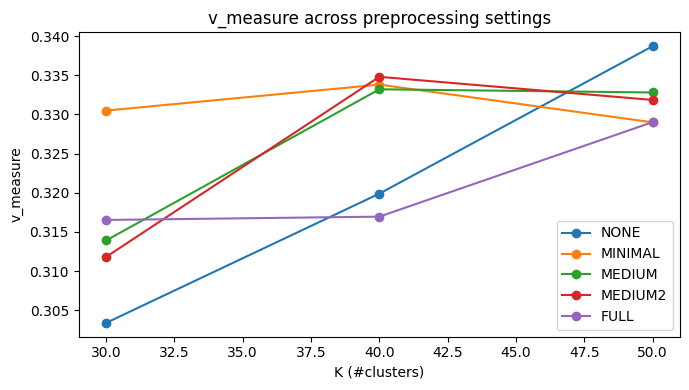

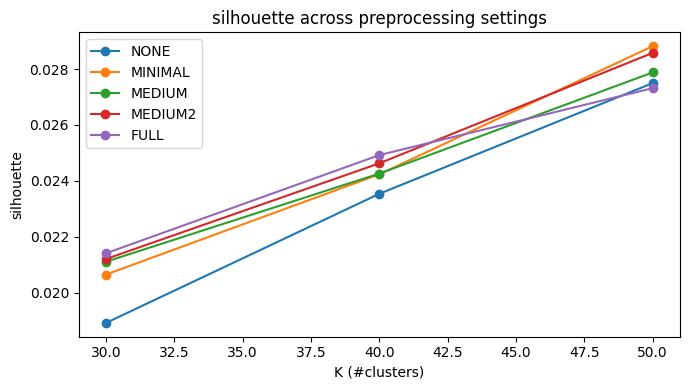

In [14]:
# -------------------------------------
# 6. Metric comparison plot
# -------------------------------------
import matplotlib.pyplot as plt

def plot_metric(results_all, metric="v_measure"):
    plt.figure(figsize=(7,4))
    
    for cfg in results_all["config"].unique():
        subset = results_all[results_all["config"] == cfg]
        plt.plot(subset["K"], subset[metric], marker="o", label=cfg)
    
    plt.title(f"{metric} across preprocessing settings")
    plt.xlabel("K (#clusters)")
    plt.ylabel(metric)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example
plot_metric(results_all, "v_measure")
plot_metric(results_all, "silhouette")


#### **6.  Metric comparison**
- Minimal denoising including "**lowercase, lemmatize and keep_short_tokens**" improved V-measure from no preprocessing. 
- Removing **stopwords** and **medical boilerplate** slightly improved cluster purity (higher silouette) compared to minimal or no preprocessing.
- However, removing **numerical tokens** (e.g., anatomical levels like “L4-L5”) reduced performance, suggesting such information is semantically meaningful in clinical text.
- Overall, the **MEDIUM2** configuration achieved the best balance between interpretability and clustering quality.

In [15]:
# -------------------------------------
# 7. Top terms per cluster
# -------------------------------------
from utils import top_terms_per_cluster

top_terms = top_terms_per_cluster(X_full, df["cluster"], vec_full, n_terms=10)
top_terms


{0: array(['weight', 'sugar', 'carbohydrate', 'calorie', 'food',
        'blood sugar', 'meal', 'pound', 'eat', 'diet'], dtype=object),
 1: array(['place', 'wound', 'diagnosis', 'catheter', 'skin', 'tumor',
        'remove', 'fracture', 'close', 'tissue'], dtype=object),
 2: array(['carotid', 'carotid artery', 'artery', 'internal carotid',
        'internal', 'common carotid', 'common', 'external carotid', 'ica',
        'cerebral'], dtype=object),
 3: array(['mr', 'axis', 'mr abc', 'state', 'abc', 'time', 'pain',
        'medication', 'xyz', 'psychiatric'], dtype=object),
 4: array(['coronary', 'artery', 'coronary artery', 'catheter', 'circumflex',
        'leave', 'stenosis', 'branch', 'french', 'vessel'], dtype=object),
 5: array(['foot', 'metatarsal', 'tendon', 'plantar', 'phalanx', 'osteotomy',
        'fifth', 'ankle', 'bone', 'joint'], dtype=object),
 6: array(['colon', 'polyp', 'colonoscopy', 'cecum', 'rectum', 'sigmoid',
        'colonoscope', 'hemorrhoid', 'sigmoid colon', 'i

#### **7. Top Terms Interpretation**

Some top contributing tokens are relevant to a specific class.
For example: 
Cluster 1: wound, tissue, fracture, tumor → Surgery 
Cluster 5: foot, tendon, osteotomy → Podiatry 
Cluster 6: colon, polyp, colonoscopy → Gastroenterology


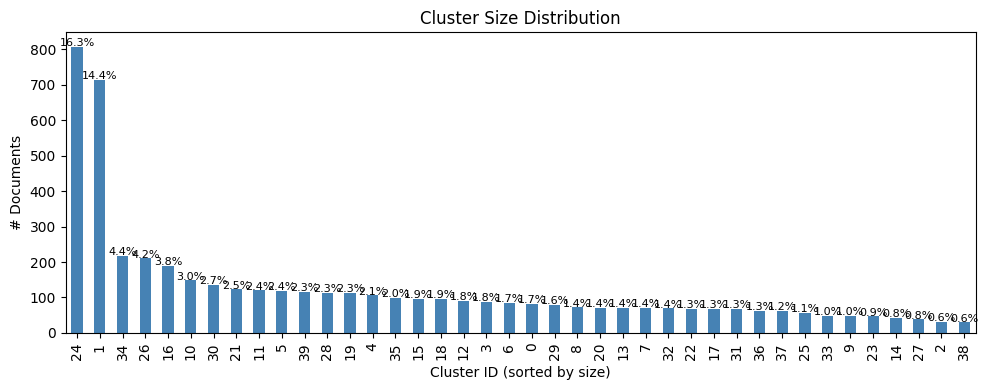

In [16]:
# -------------------------------------
# 8. Cluster size distribution
# -------------------------------------
from utils import plot_cluster_sizes
plot_cluster_sizes(df)


#### **8. Clustering Sizes Analysis**
- The dataset is highly imbalanced, with a few specialties like "Surgery" and "Consult – History and Phy." dominating the samples.
- The clustering results mirror this imbalance — a few large clusters capture most documents, while many small clusters contain very few.
- This suggests that the clustering may reflect the overall data distribution but lacks fine-grained separation among smaller medical specialties.

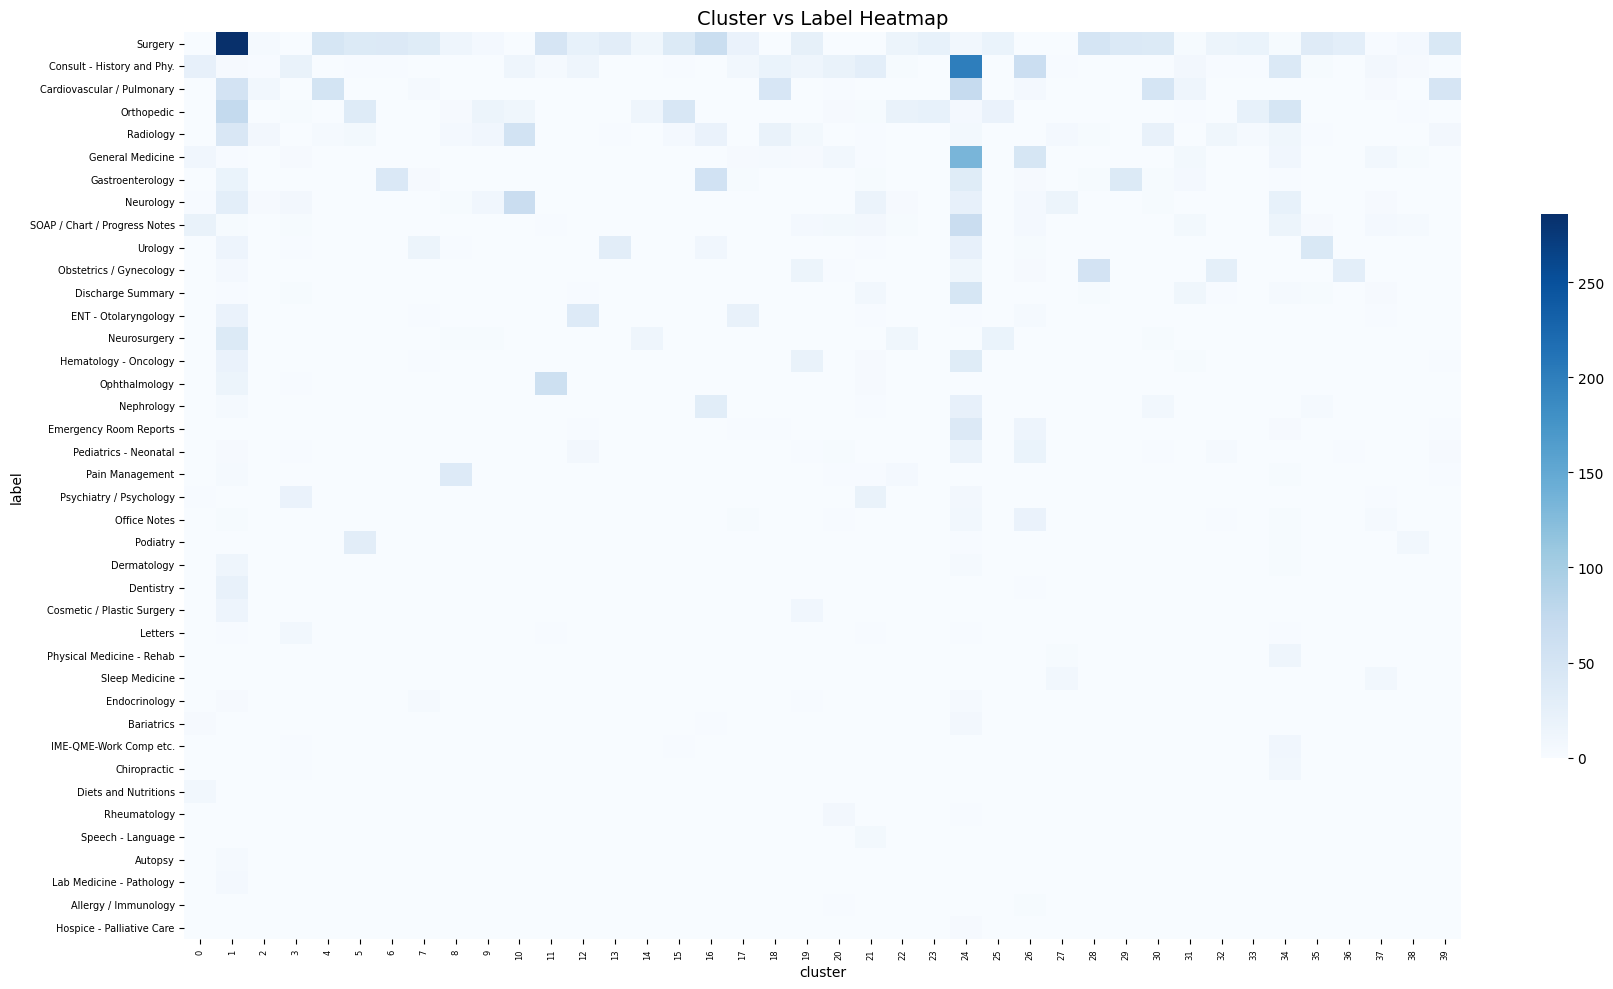

In [17]:
# -------------------------------------
# 9. Crosstab heatmap
# -------------------------------------
from utils import plot_crosstab
plot_crosstab(df.rename(columns={"cluster_fullK": "cluster"}))


#### **9. Compare Label vs. Cluster**

From this heatmap, we can make a few clear observations:

- Cluster–label alignment is weak overall, with most labels spreading across many clusters and vice versa.

- A few strong alignments stand out — for example, Surgery aligns heavily with a single dominant cluster (around cluster 0), and Consult – History and Phy. has another distinct concentration (around cluster 24).

- Most other specialties (e.g., Radiology, Ophthalmology, ENT) show mild or scattered associations, indicating that the clustering captures some coarse structure (major groups like Surgery vs. Consult) but not fine-grained medical specialties.

- Row-wise observation checks how each label maps to clusters. Good examples are: 
    -  **ophthalmology**, has only **cluster 11** dominant, where the top terms are 'eye', 'chamber', 'lens', 'cataract', 'intraocular', 'speculum', etc.
    -  **Podiatry**, has only **cluster 5** dominant, where the top terms are 'foot', 'metatarsal', 'tendon', 'plantar','ankle', etc. 

In short: the model differentiates major document types but still mixes many similar or overlapping specialties.

In [ ]:
# -------------------------------------
# 10. t-SNE visualization
# -------------------------------------
from utils import plot_tsne
plot_tsne(X_full, df["cluster"])


#### **10. 2D Visualization**

